In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from kaggle.api.kaggle_api_extended import KaggleApi

In [35]:
sns.set(style='whitegrid')

In [2]:
os.chdir("../")

In [3]:
api = KaggleApi()
api.authenticate()

In [4]:
DATA_PATH = os.path.join(os.getcwd(), "data")

In [5]:
os.makedirs(DATA_PATH, exist_ok=True)

In [6]:
api.dataset_download_files(
    dataset="adityakadiwal/water-potability",
    path=DATA_PATH,
)

In [7]:
!unzip data/water-potability.zip -d data
!rm data/water-potability.zip

Archive:  data/water-potability.zip
  inflating: data/water_potability.csv  


# Load data

In [10]:
df = pd.read_csv("data/water_potability.csv")

In [12]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<AxesSubplot:xlabel='Potability', ylabel='count'>

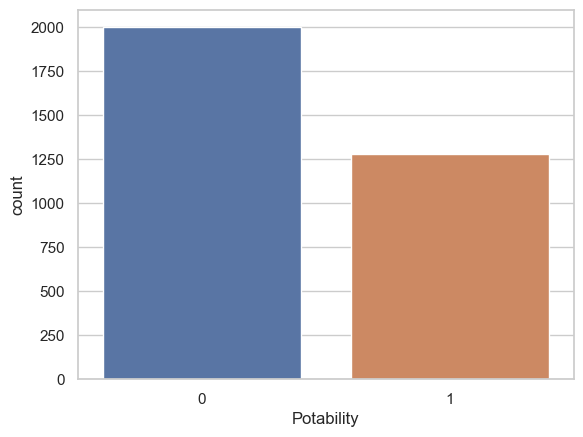

In [36]:
sns.countplot(data=df, x='Potability')

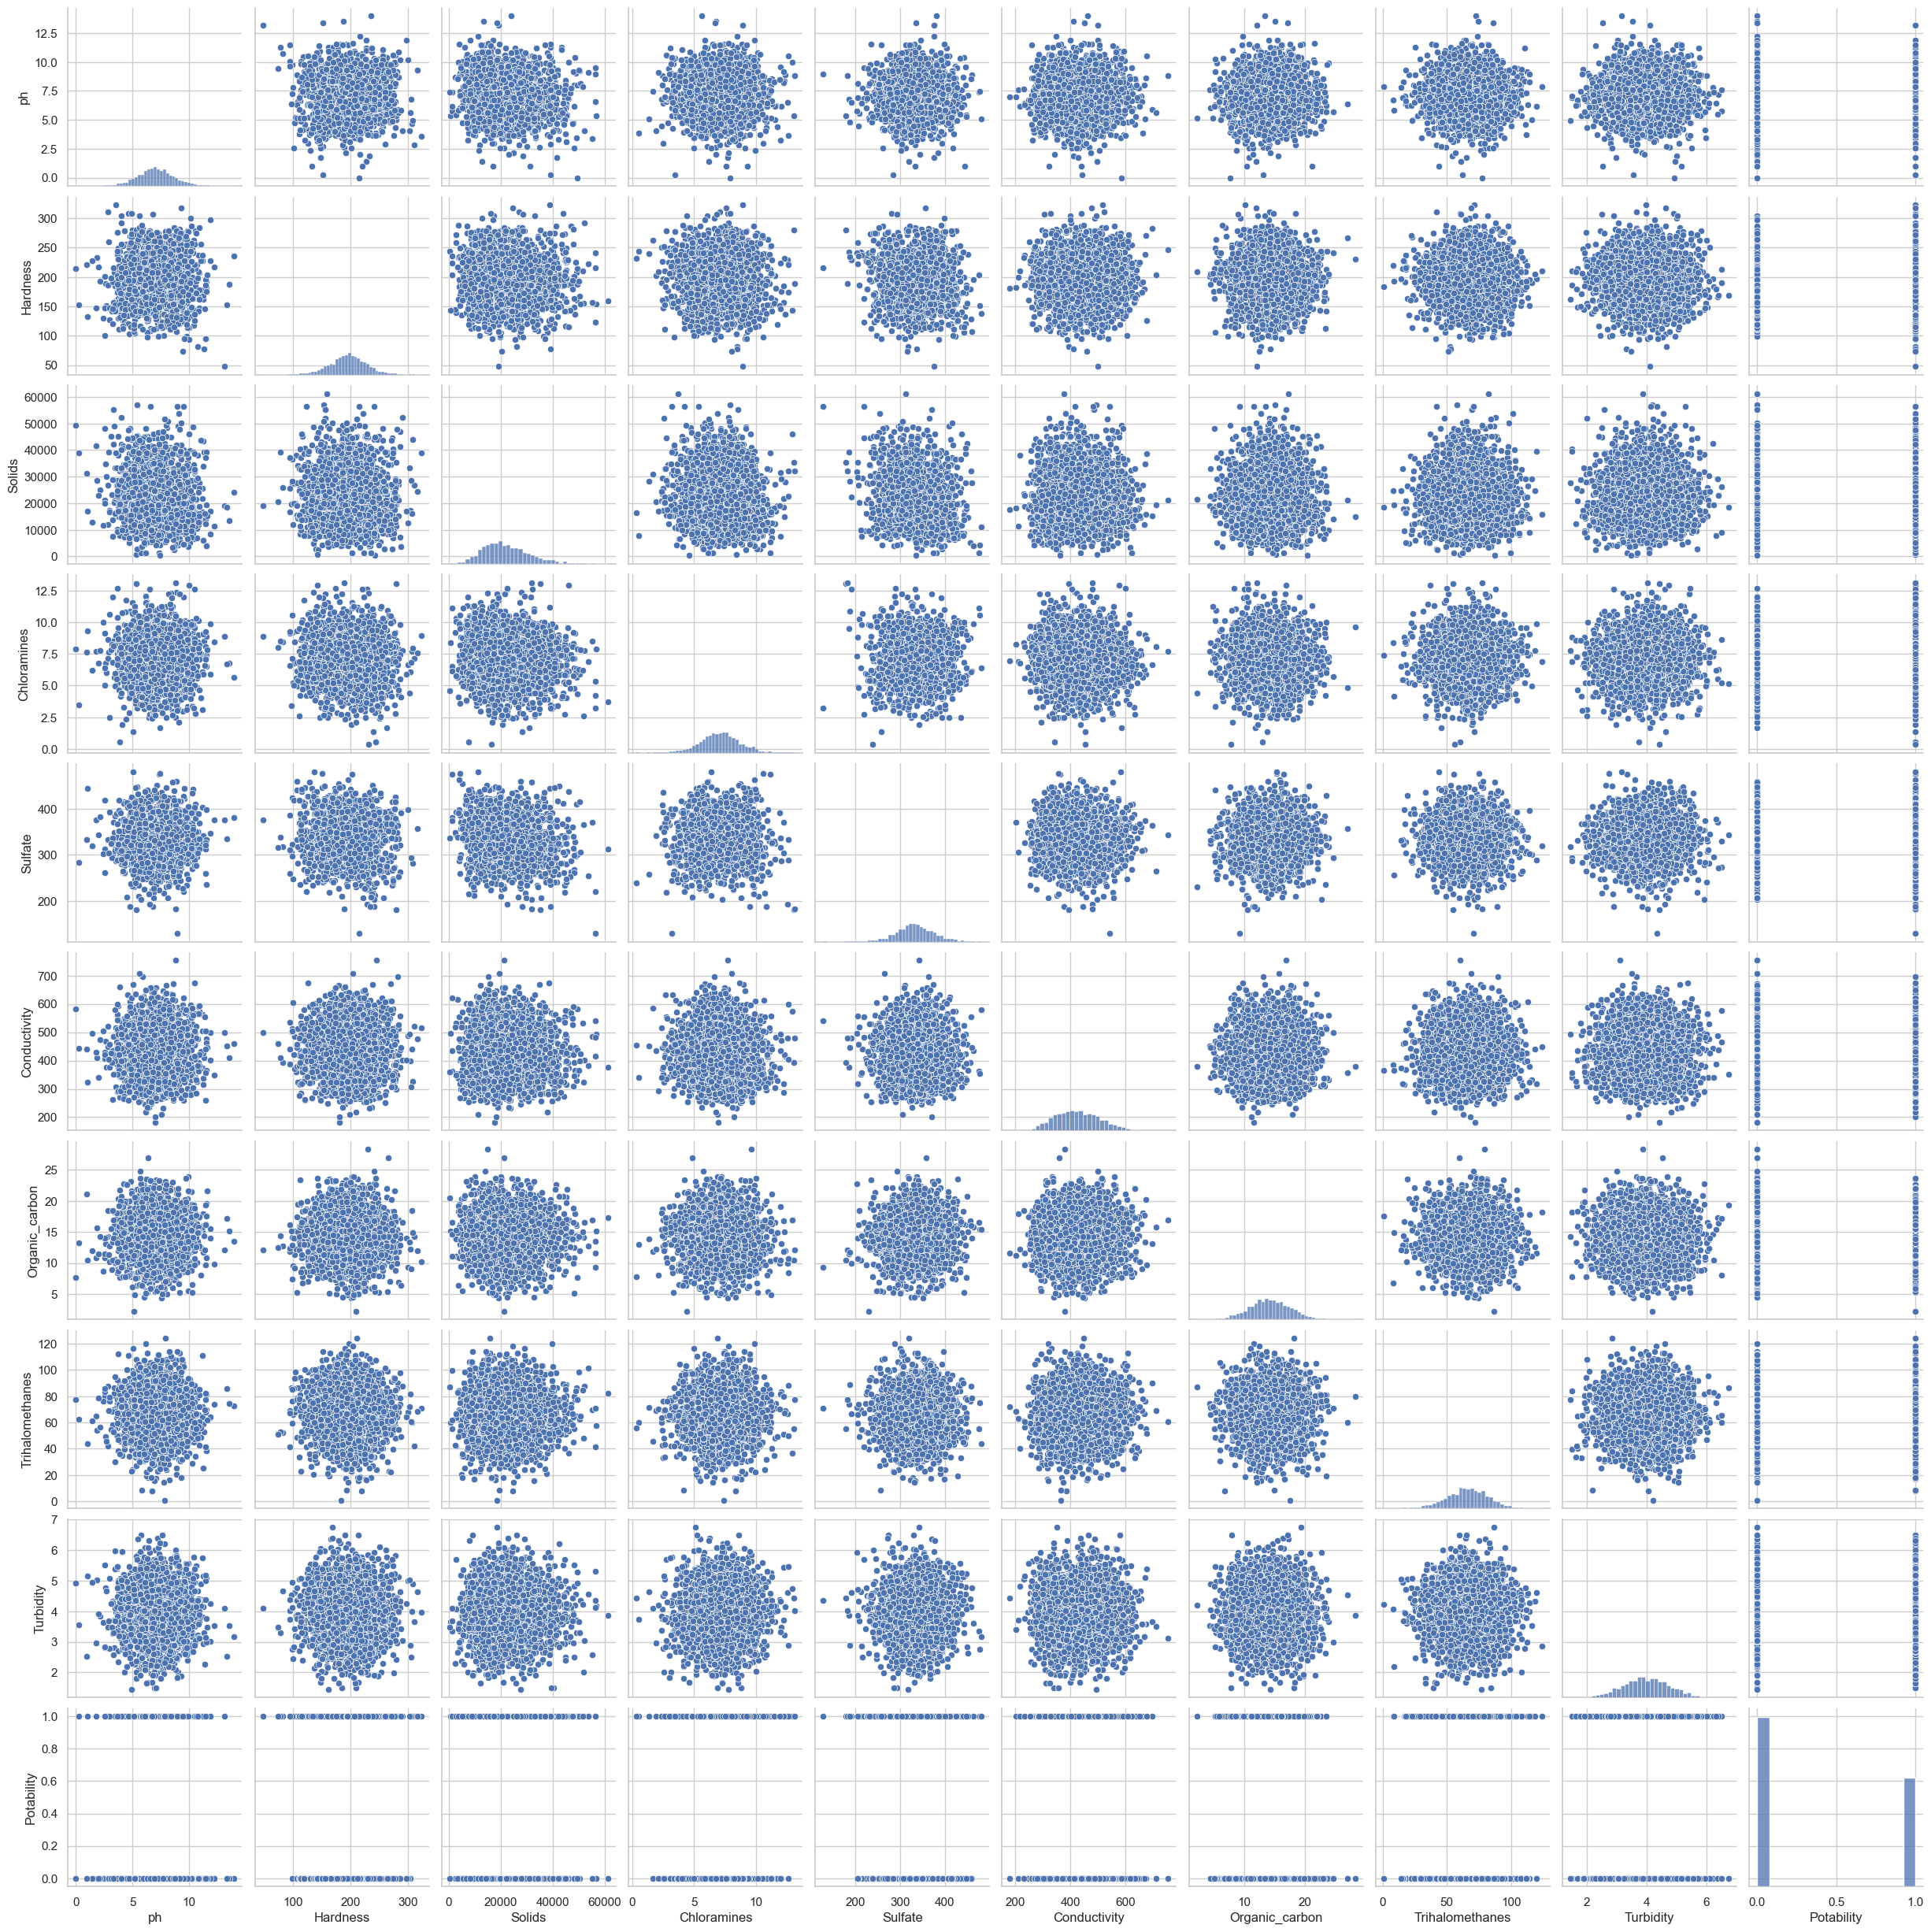

In [37]:
sns.pairplot(data=df)

Text(0.5, 1.0, 'Missing values (%)')

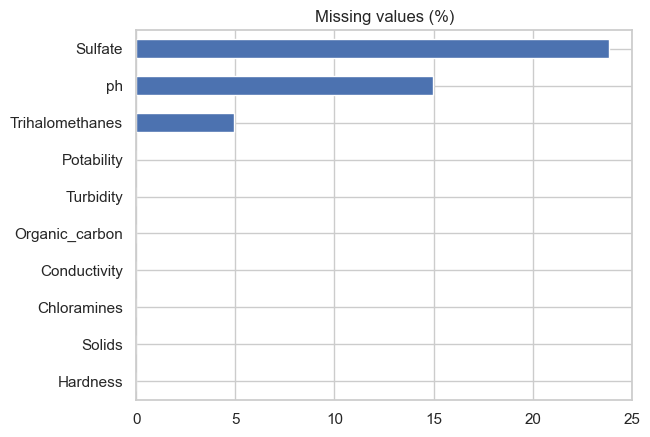

In [60]:
missing_values = df.isna().sum()
missing_values /= df.shape[0] 
missing_values *= 100
missing_values.sort_values(ascending=True).plot(kind="barh")
plt.title("Missing values (%)")

# Train baseline

In [62]:
# Right now, let's drop all NaNs for simplicity
df = df.dropna()

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, roc_curve

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [66]:
import lightgbm as lgb

In [68]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)

In [69]:
param_grid = {
    "n_estimators": [1000],
    "random_state": [42],
}

In [71]:
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring="f1",
)

In [73]:
TARGET_COL = "Potability"

In [75]:
X = df.drop(TARGET_COL, axis=1)
y = df[TARGET_COL]

In [77]:
grid_model.fit(X, y)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=42),
             param_grid={'n_estimators': [1000], 'random_state': [42]},
             scoring='f1')

In [78]:
grid_model.best_score_

0.48797386827912925